Benny Cohen

7/22/2020

Decision Trees & Random Forests


### Introduction

In this notebook we will be looking at a dataset about mushrooms from the UCI repository. We will be trying to predict the veil color of mushrooms. The veil is a thin membrane that covers baby mushrooms. 

To do this, we will perform eda and then create 2 regression trees and 2 random forests. We will compare the results of our 2 models and try to determine which is the best one.

### Exploratory Data Analysis 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  


In [4]:
username = 'cohenb51'
path = 'Katz_School/develop/DAV6150/M11_Data.csv'
df = pd.read_csv(f'https://raw.githubusercontent.com/{username}/{path}')

In [12]:
columns = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color','stalk-shape', 'stalk-root','stalk-surfac-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color' ,'ring-number','ring-type' ,'spore-print-color' ,'population','habitat']

In [14]:
df = pd.read_csv(f'https://raw.githubusercontent.com/{username}/{path}', names = columns)

In [18]:
df.head(2)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
p,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
e,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8124 entries, p to e
Data columns (total 22 columns):
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surfac-above-ring     8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number                 8124 non-null object
ring-type          

As we see here, all of our variables are categorical variables. Each variable is represented as a single char representing what the value is. 

The values can be found here: https://archive.ics.uci.edu/ml/datasets/mushroom
    
1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d



All of these variables describe physical charechteristics of the mushroom, although some of the definitions are somewhat ambigious. 

<img src = https://i2.wp.com/www.mushroomdiary.co.uk/wp-content/uploads/2011/09/parts-of-a-mushroom.gif> 

In [20]:
df.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surfac-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

The first 3 columns, cap-shape, cap surface, and cap-color, describes the top of the mushroom called the cap as shown in the image above.

Some mushrooms change colors when bleeding. https://www.mushroom-appreciation.com/identifying-mushrooms.html#sthash.2MABYuOv.dpbs. Bruising is set to true when a mushroom changes color for this reason. 

The gills columns represent the structure underneath the cap. We can see that the characteristics of gills vary between mushrooms. 

The stalk columns represent the vertical part of the mushroom. 

As mentioned earlier, the veil is the thin membrane that covers mushrooms. Some mushrooms have remnants of the membrane as they develop. Universal membranes fully encompass the mushroom https://en.wikipedia.org/wiki/Universal_veil while a partial veil extends from the stem surface to the cap edge. Mushrooms can have both of these.

The rings as the picture indicates are remnants of the veil.



As we are predicting the veil-color, we would think that the other physical charechteristics of mushroom can help us.

Let's first look at our distributions by creating bar plots.

<BarContainer object of 4 artists>

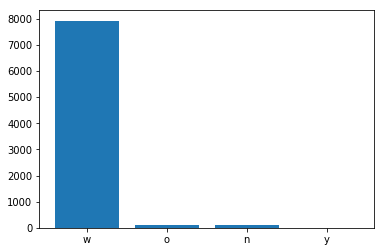

In [31]:
counts = df['veil-color'].value_counts()
plt.bar(counts.index, counts.values) 

In [32]:
counts

w    7924
o      96
n      96
y       8
Name: veil-color, dtype: int64

Our target variable, veil color is heavily skewed. Most veil colors are white and only 8 are yellow. 

Let's now plot all the variables. Since we are going to be constructing trees, we might want to see which variables are more evenly distributed and which will sort the categories mainly into 1 type. 

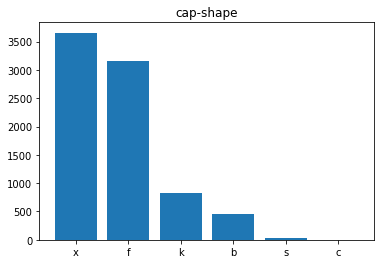

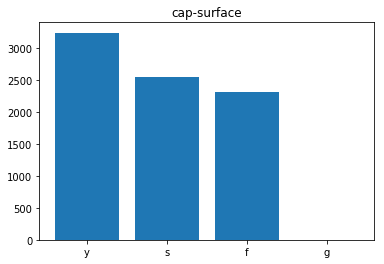

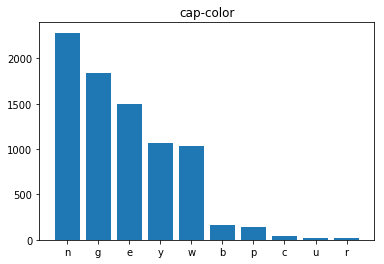

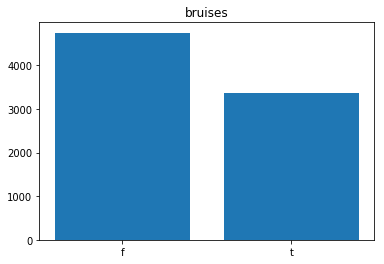

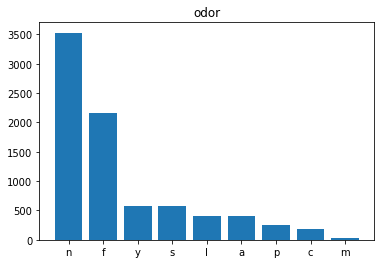

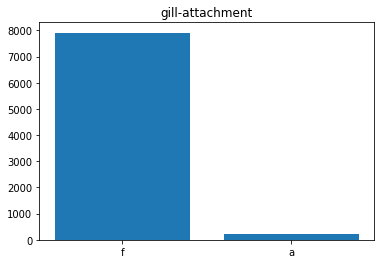

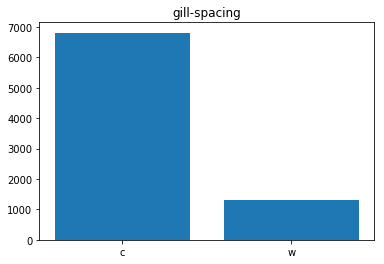

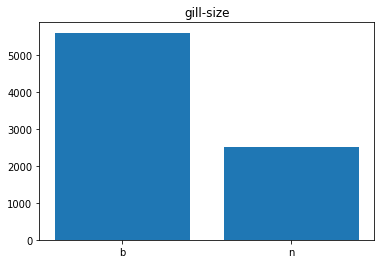

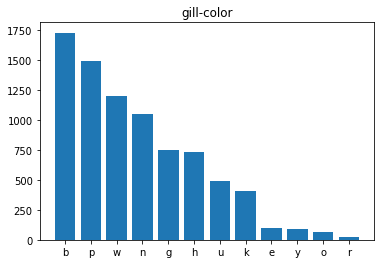

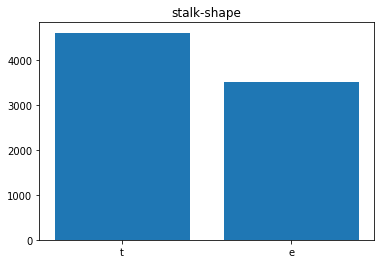

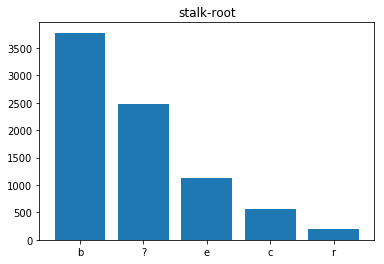

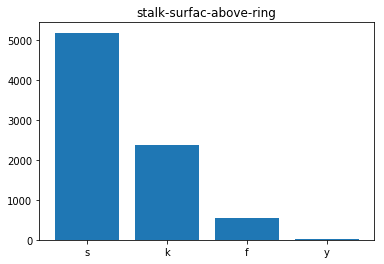

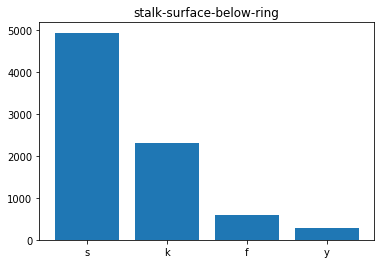

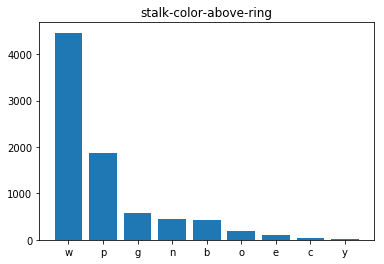

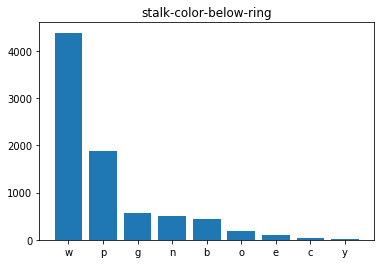

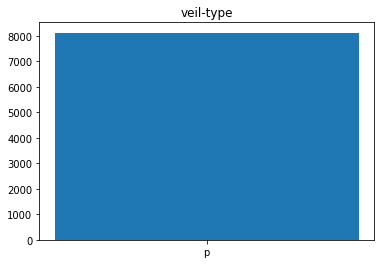

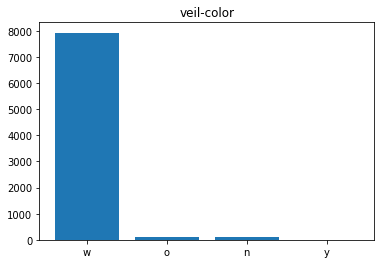

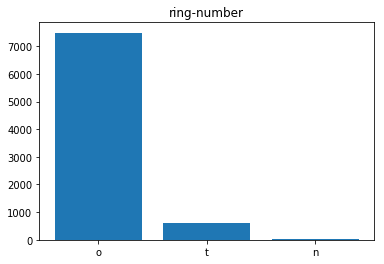

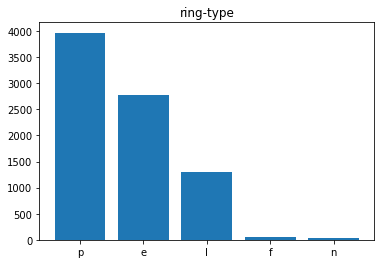

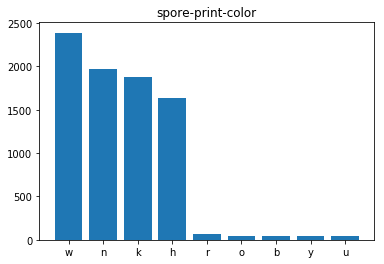

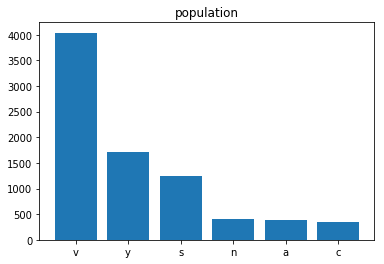

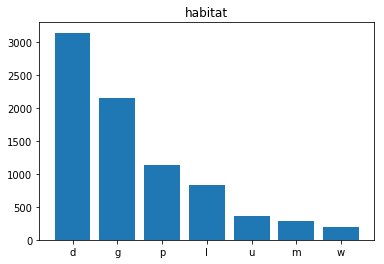

In [37]:
for i in df.columns:
    plt.figure()
    counts = df[i].value_counts()
    plt.title(i)
    plt.bar(counts.index, counts.values)
plt.show()

We see that all of our categories mainly have 1 dominant type. 

For example, most mushrooms have an odor value of 0, that is none. In particular, gill-attachment and spacing is almost always false.

There are a few exceptions to this though. For example, Stalk Shape almost evenly splits our data. This might be important to keep in mind when we construct our random forest which is based on entropy.

In [77]:
df['veil-type'].value_counts()

p    8124
Name: veil-type, dtype: int64

In [ ]:
All of the veil types are partial. 

Now let's see if we notice anything by grouping by our target variable. Since there are over 20 columns we won't look at every one but we will look at the one from each category we looked at above.

In [104]:
from scipy import stats

modes = df.groupby('veil-color')['habitat']

The habitat is a general column so we might expect to see some differences with this column.

In [105]:
modes.value_counts()

veil-color  habitat
n           l            96
o           l            96
w           d          3148
            g          2148
            p          1144
            l           632
            u           368
            m           292
            w           192
y           l             8
Name: habitat, dtype: int64

Remember grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

and brown=n,orange=o,white=w,yellow=y

Overall we saw from the distributions above that d, woods, is the most popular column. This group by shows that all of the woods have white veil colors. Potentially, this could help a tree - for example if a feature is in woods, then put it in the white veil color category.

In [61]:
df.groupby('veil-color')['cap-shape'].value_counts()

veil-color  cap-shape
n           b              24
            f              24
            k              24
            x              24
o           b              24
            f              24
            k              24
            x              24
w           x            3608
            f            3102
            k             778
            b             402
            s              32
            c               2
y           b               2
            c               2
            f               2
            k               2
Name: cap-shape, dtype: int64

Here, the cap shape seems to be evenly distributed among veil color. Let's try looking at another cap feature.

In [62]:
df.groupby('veil-color')['cap-surface'].value_counts()

veil-color  cap-surface
n           s                96
o           s                96
w           y              3236
            s              2364
            f              2320
            g                 4
y           y                 8
Name: cap-surface, dtype: int64

It's interesting here that all the brown and orange veil colors have smooth cap surfaces even though the majority class is y. It seems like this feature is doing something.

In [64]:
df.groupby('veil-color')['stalk-shape'].value_counts()

veil-color  stalk-shape
n           e                96
o           e                96
w           t              4608
            e              3316
y           e                 8
Name: stalk-shape, dtype: int64

Stalk shape can either be enlarging (e) or tapering (t). All the minority classes have values of e which is the majority stalk-shape column so it is hard to generalize from this.

In [65]:
df.groupby('veil-color')['stalk-root'].value_counts()

veil-color  stalk-root
n           ?               96
o           ?               96
w           b             3776
            ?             2288
            e             1120
            c              548
            r              192
y           c                8
Name: stalk-root, dtype: int64

We notice here that we actually have 'nulls' encoded as ?. Not only that but a large percentage of these values have ?

In [69]:
import numpy as np
df = df.replace('?', np.nan)

In [71]:
df.isna().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surfac-above-ring        0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [72]:
df = df.replace(np.nan, '?')

We see that this only applies to stalk root. From our dataset description, this means that a stalk root is missing. The root is part of a mushroom. If it is not there then it must mean it fell off. This is something that occurs after the fact though and we wouldn't think should be related to the veil color. 

In [73]:
df = df.replace(np.nan, '?')

In [ ]:
I think we should put them back as '?' since this is data - it indicates the stalk root is missing. 

In [80]:
df.groupby('veil-color')['gill-attachment'].value_counts()

veil-color  gill-attachment
n           a                    96
o           a                    96
w           f                  7906
            a                    18
y           f                     8
Name: gill-attachment, dtype: int64

This is interesting - All of the minority veil-colors have attached gills. This is a useful feature.

In [82]:
df.groupby('veil-color')['stalk-color-below-ring'].value_counts()

veil-color  stalk-color-below-ring
n           o                           96
o           o                           96
w           w                         4384
            p                         1872
            g                          576
            n                          512
            b                          432
            e                           96
            c                           36
            y                           16
y           y                            8
Name: stalk-color-below-ring, dtype: int64

In [ ]:
The stalk color also seems heavily related to the veil color. The yellow veil-color also has a yellow stalk color. 

Let's see if the other color columns follow this trend.

In [83]:
df.groupby('veil-color')['stalk-color-above-ring'].value_counts()

veil-color  stalk-color-above-ring
n           o                           96
o           o                           96
w           w                         4464
            p                         1872
            g                          576
            n                          448
            b                          432
            e                           96
            c                           36
y           y                            8
Name: stalk-color-above-ring, dtype: int64

This variable seems to be almost identical to stalk color below ring.

In [93]:
(df['stalk-color-above-ring'] != df['stalk-color-below-ring']).sum()

3056

Actually there is a difference since they aren't the same in 3056 cases. 

In [94]:
df.groupby('veil-color')['cap-color'].value_counts()

veil-color  cap-color
n           n              96
o           n              96
w           n            2092
            g            1840
            e            1500
            y            1064
            w            1040
            b             168
            p             144
            c              44
            r              16
            u              16
y           y               8
Name: cap-color, dtype: int64

This color column also seems revealing. All of the brown/orange veil-colors have brown caps.

In [97]:
df.groupby('veil-color')['population'].value_counts()

veil-color  population
n           c               48
            v               48
o           c               48
            v               48
w           v             3944
            y             1712
            s             1248
            n              400
            a              384
            c              236
y           c                8
Name: population, dtype: int64

This variable does not seem so useful because v has an overwhelmingly majority and the other values are spread out round equally. 

In [99]:
df.groupby('veil-color')['odor'].value_counts()

veil-color  odor
n           n         96
o           n         96
w           n       3328
            f       2160
            s        576
            y        576
            a        400
            l        400
            p        256
            c        192
            m         36
y           n          8
Name: odor, dtype: int64

This variable also does not seem so useful as the oder is mainly n for all the classes.

In [101]:
df.groupby('veil-color')['cap-surface'].value_counts()

veil-color  cap-surface
n           s                96
o           s                96
w           y              3236
            s              2364
            f              2320
            g                 4
y           y                 8
Name: cap-surface, dtype: int64

In [ ]:
It seems like the cap surface columns can help us as we see that all the brown nd orange veil colors have smooth surfaces.

### Data Preparation 

We will be constructing 2 types of models, random forest and trees. Tree based models are good at handeling categorical variables. That being said though, the sklearn implementation requires us to one hot encode the variables. https://stackoverflow.com/questions/24715230/can-sklearn-random-forest-directly-handle-categorical-features

In [74]:
df.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surfac-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

We saw in our eda that veil type has no variance and that they all are partial. Let's therefore drop this feature.

In [78]:
df = df.drop('veil-type', axis = 1)

We saw that odor, and population did not really seperate between any of the classes so well so let's drop this variable too.

In [102]:
df = df.drop('odor', axis = 1)


In [103]:
df = df.drop('population', axis = 1)

Now let's create our dummy variables

In [123]:
data = pd.get_dummies(df, drop_first=True)
    

Finally let's create 2 sets of columns which we will use to construct our models. 

We saw a very big difference with the color columns, and the cap columns so let's use that s 1 set and use all the columns in the other set. They all represent physical features of the mushroom so it is hard to just drop them since they may still have an impact in our model.

In [127]:
colorColumns = ['cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n',
       'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w',
       'cap-color_y','stalk-color-above-ring_c',
       'stalk-color-above-ring_e', 'stalk-color-above-ring_g',
       'stalk-color-above-ring_n', 'stalk-color-above-ring_o',
       'stalk-color-above-ring_p', 'stalk-color-above-ring_w',
       'stalk-color-above-ring_y', 'stalk-color-below-ring_c',
       'stalk-color-below-ring_e', 'stalk-color-below-ring_g',
       'stalk-color-below-ring_n', 'stalk-color-below-ring_o',
       'stalk-color-below-ring_p', 'stalk-color-below-ring_w',
       'stalk-color-below-ring_y', 'spore-print-color_h',
       'spore-print-color_k', 'spore-print-color_n', 'spore-print-color_o',
       'spore-print-color_r', 'spore-print-color_u', 'spore-print-color_w',
       'spore-print-color_y']

### Decision Tree + Random Forest Modeling

First split into train and test set...

In [135]:
from sklearn.model_selection import train_test_split
y = df['veil-color']
x= data.drop(['veil-color_o', 'veil-color_w','veil-color_y'], axis = 1)

In [136]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [141]:
from sklearn.tree import DecisionTreeClassifier
rf = DecisionTreeClassifier()
rf.fit(X_train[colorColumns], y_train)

DecisionTreeClassifier()

In [146]:
preds = rf.predict(X_train[colorColumns])

In [148]:
import sklearn.metrics as metrics

In [154]:
metrics.accuracy_score(y_train,preds)

0.9892291121711032

This model seems to have an accuracy score close to 99 percent.

In [157]:
(df['veil-color'] == 'w').sum()/len(df)

0.9753815854258986

About 97 percent of our dataset though is w so this doesn't mean so much for us if we are just looking at w. Let's therefore see how our distributions compare. 

In [150]:
print(metrics.classification_report(y_train, preds))

              precision    recall  f1-score   support

           n       0.54      1.00      0.70        82
           o       0.00      0.00      0.00        70
           w       1.00      1.00      1.00      6340
           y       1.00      1.00      1.00         7

    accuracy                           0.99      6499
   macro avg       0.63      0.75      0.68      6499
weighted avg       0.98      0.99      0.99      6499



We seem to be able to predict the y class very well as we got all of those points correct. We also are predicting, n, brown, correctly more than half of the time. Our recall score is good for brown showing that we are identifying all the cases but when we identify those cases it isn't so precise. 

We might be able to get better performance if we play with the parameters which control for splitting. We also have to contend with the fact that trees are prone to overfitting. 

Let's use grid search to find the best parameters while reducting overfitting. 

In [164]:
param_grid = {'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150], 'criterion': ['gini', 'entropy'] #determines on what basis to select the next node. 
             }

In [167]:
from sklearn.svm import SVC  
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(),param_grid, cv = 5)
res = grid.fit(X_train[colorColumns],y_train)


In [168]:
res.best_params_


{'criterion': 'gini', 'max_depth': 4}

We see that our best scores is with gini and a max_depth of 4. 

In [171]:
from sklearn.tree import DecisionTreeClassifier
rf = DecisionTreeClassifier(criterion = 'gini', max_depth = 4)
rf.fit(X_train[colorColumns], y_train)

DecisionTreeClassifier(max_depth=4)

In [173]:
preds = rf.predict(X_train[colorColumns])

This score is around what we got earlier for accuracy.

In [174]:
print(metrics.classification_report(y_train, preds))

              precision    recall  f1-score   support

           n       0.54      1.00      0.70        82
           o       0.00      0.00      0.00        70
           w       1.00      1.00      1.00      6340
           y       1.00      1.00      1.00         7

    accuracy                           0.99      6499
   macro avg       0.63      0.75      0.68      6499
weighted avg       0.98      0.99      0.99      6499



C:\Users\b-coh\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Our results are almost identical. This seems to indicate that we aren't overfitting so much.

In [178]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X_train[colorColumns], y_train, cv=5)
scores

array([0.98692308, 0.98769231, 0.98923077, 0.98923077, 0.98460354])

Our cross val scores all are around the same, (keeping in mind this is accuracy)

#### Model 2

Let's create the same type of model, just now use all the fetures we filtered earlier. I would expect this model to behave a bit more randomly since there are more variables and more features to choose to split on. It also may turn out to perform similarly if the other variables have little effect on our target variable.

Let's therefore use grid search again to find the best criteria to split on and when to stop to avoid overfitting.

In [180]:
grid = GridSearchCV(DecisionTreeClassifier(),param_grid, cv = 5)
res = grid.fit(X_train,y_train)

In [181]:
res.best_params_


{'criterion': 'gini', 'max_depth': 4}

We have the same best criteria.

In [182]:
rf = DecisionTreeClassifier(criterion = 'gini', max_depth = 4)
rf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [183]:
preds = rf.predict(X_train)

In [184]:
print(metrics.classification_report(y_train, preds))

              precision    recall  f1-score   support

           n       0.55      0.99      0.71        82
           o       0.80      0.06      0.11        70
           w       1.00      1.00      1.00      6340
           y       1.00      1.00      1.00         7

    accuracy                           0.99      6499
   macro avg       0.84      0.76      0.70      6499
weighted avg       0.99      0.99      0.99      6499



Our results are somewhat different than our first model. With this model, our tree is putting some values in the orange class. At the same time though, the recall score is very low at .06. One note though, is that from a practical standpoint, orange is very close to brown. A dirty orange may seem to be brown. 

I think because of this, we should create a new metric that would count orange correct if it is really brown and vice versa. We should just keep this variable in mind when comparing our models. 

In [186]:
preds[preds == 'o'] = 'n'

In [189]:
transformedTest = y_train.copy()
transformedTest[transformedTest == 'o'] = 'n'

In [190]:
print(metrics.classification_report(transformedTest, preds))

              precision    recall  f1-score   support

           n       1.00      1.00      1.00       152
           w       1.00      1.00      1.00      6340
           y       1.00      1.00      1.00         7

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499



After converting our oranges to brown our model has perfect accuracy and f1 score. 

I would question here how our labels are collected... Is orange really distinct from brown and is it possible the way that the labels are being annotated is not 100 percent objective?

Let's see how our first model would do with this metric.

In [197]:
rf = DecisionTreeClassifier(criterion = 'gini', max_depth = 4)
rf.fit(X_train[colorColumns], y_train)

DecisionTreeClassifier(max_depth=4)

In [198]:
preds[preds == 'o'] = 'n'
print(metrics.classification_report(transformedTest, preds))

              precision    recall  f1-score   support

           n       1.00      1.00      1.00       152
           w       1.00      1.00      1.00      6340
           y       1.00      1.00      1.00         7

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499



This is worth noting but we shouldn't per say use this to say model 1 is better than model 2 since model 1 was completly unable to identify any oranges.

#### Random Forest

A random forest is a more complicated model that involves creating multiple decision trees. This should reduce overfitting.

In [206]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=123456)
rf.fit(x[colorColumns], y)


RandomForestClassifier(random_state=123456)

In [207]:
preds = rf.predict(X_train[colorColumns])

In [208]:
print(metrics.classification_report(y_train, preds))

              precision    recall  f1-score   support

           n       0.54      0.74      0.63        82
           o       0.47      0.27      0.35        70
           w       1.00      1.00      1.00      6340
           y       1.00      1.00      1.00         7

    accuracy                           0.99      6499
   macro avg       0.75      0.75      0.74      6499
weighted avg       0.99      0.99      0.99      6499



The random forest seems to be splitting the values between orange and brown and perfectly classifing the other columns.

This intuitivly makes sense - when we select multiple trees some trees may be more likely to put a row in orange or brown.

We actually already can see that if we ignore the difference between orange and brown we will have perfect classification since w and y are being predicted perfectly.

Let's confirm though...

In [209]:
preds[preds == 'o'] = 'n'
print(metrics.classification_report(transformedTest, preds))

              precision    recall  f1-score   support

           n       1.00      1.00      1.00       152
           w       1.00      1.00      1.00      6340
           y       1.00      1.00      1.00         7

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499



Model 4...

Now since we see our random forest is doing well we might want to try a subset of the columns and see if that works as well. 

In [210]:
colorColumns

['cap-color_c',
 'cap-color_e',
 'cap-color_g',
 'cap-color_n',
 'cap-color_p',
 'cap-color_r',
 'cap-color_u',
 'cap-color_w',
 'cap-color_y',
 'stalk-color-above-ring_c',
 'stalk-color-above-ring_e',
 'stalk-color-above-ring_g',
 'stalk-color-above-ring_n',
 'stalk-color-above-ring_o',
 'stalk-color-above-ring_p',
 'stalk-color-above-ring_w',
 'stalk-color-above-ring_y',
 'stalk-color-below-ring_c',
 'stalk-color-below-ring_e',
 'stalk-color-below-ring_g',
 'stalk-color-below-ring_n',
 'stalk-color-below-ring_o',
 'stalk-color-below-ring_p',
 'stalk-color-below-ring_w',
 'stalk-color-below-ring_y',
 'spore-print-color_h',
 'spore-print-color_k',
 'spore-print-color_n',
 'spore-print-color_o',
 'spore-print-color_r',
 'spore-print-color_u',
 'spore-print-color_w',
 'spore-print-color_y']

In [211]:
colorColumnsSubset = ['cap-color_c',
 'cap-color_e',
 'cap-color_g',
 'cap-color_n',
 'cap-color_p',
 'cap-color_r',
 'cap-color_u',
 'cap-color_w',
 'cap-color_y',
 'stalk-color-above-ring_c',
 'stalk-color-above-ring_e',
 'stalk-color-above-ring_g',
 'stalk-color-above-ring_n',
 'stalk-color-above-ring_o',
 'stalk-color-above-ring_p',
 'stalk-color-above-ring_w',
 'stalk-color-above-ring_y']

We saw these columns in particular made a big difference in our eda. 

In [216]:
rf = RandomForestClassifier(n_estimators=100, random_state=123456)
rf.fit(x[colorColumnsSubset], y)

RandomForestClassifier(random_state=123456)

In [217]:
preds = rf.predict(X_train[colorColumnsSubset])

In [218]:
print(metrics.classification_report(y_train, preds))

              precision    recall  f1-score   support

           n       0.00      0.00      0.00        82
           o       0.46      1.00      0.63        70
           w       1.00      1.00      1.00      6340
           y       1.00      1.00      1.00         7

    accuracy                           0.99      6499
   macro avg       0.62      0.75      0.66      6499
weighted avg       0.98      0.99      0.98      6499



C:\Users\b-coh\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


This is interesting. We have perfect scores between w and y again. The only features we have trouble predicting again are brown and orange. 

Unlike our other models though, this model has trouble predicting brown. 

Out of curiosity, let's see how a single decision tree would do on this.

In [223]:
rf = DecisionTreeClassifier()
rf.fit(x[colorColumnsSubset], y)
preds = rf.predict(X_train[colorColumnsSubset])

In [224]:
print(metrics.classification_report(y_train, preds))

              precision    recall  f1-score   support

           n       0.54      1.00      0.70        82
           o       0.00      0.00      0.00        70
           w       1.00      1.00      1.00      6340
           y       1.00      1.00      1.00         7

    accuracy                           0.99      6499
   macro avg       0.63      0.75      0.68      6499
weighted avg       0.98      0.99      0.99      6499



C:\Users\b-coh\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Interestingly, a single tree still doesn't predict oranges still even with this subset.

### Model Comparison

I don't think it is particularly meaningful to compare our metrics here. All of our models almost perfectly predicted veil-colors of white and yellow.

They varied in how they predicted orange and brown. All of our tree models had an f1 score close to 0 for our orange variable. Our first and last tree model didn't predict any oranges and our 2nd had a very low recall score. 

With our random forests, our first model correctly classified around half of each points in the right groups while our second model had a precision and recall score of 0 when predicting orange.

I think it's fair to say based on this, that none of our models can accuratly predict the difference between orange and brown. The random forest model which does is only right in putting it in the right category around half the time.

Therefore, since all of our models can predict the other columns perfectly, let's use the simplest model- the last one. Let's first use cross validation to make sure that it is not overfitting.

Unlike random forests, we need to be cautious here since it is very easy to overfit trees. 

In [227]:
rf = DecisionTreeClassifier(criterion = 'gini', max_depth = 4)

scores = cross_val_score(rf, X_train[colorColumnsSubset], y_train, cv=5)
scores

array([0.98923077, 0.98923077, 0.98923077, 0.98923077, 0.98922248])

Our cross val scores all seem to be around the same so let's go ahead and test on our test data.

In [228]:
rf.fit(X_train[colorColumnsSubset], y_train)

DecisionTreeClassifier(max_depth=4)

In [229]:
preds = rf.predict(X_test[colorColumnsSubset])

In [231]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           n       0.35      1.00      0.52        14
           o       0.00      0.00      0.00        26
           w       1.00      1.00      1.00      1584
           y       1.00      1.00      1.00         1

    accuracy                           0.98      1625
   macro avg       0.59      0.75      0.63      1625
weighted avg       0.98      0.98      0.98      1625



C:\Users\b-coh\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We see almost the identical behavior in our test data. We perfectly predict white and yellow and can't distinguish between orange and brown.  

In [232]:
metrics.confusion_matrix(y_test,preds)

array([[  14,    0,    0,    0],
       [  26,    0,    0,    0],
       [   0,    0, 1584,    0],
       [   0,    0,    0,    1]], dtype=int64)

We see here that 26 were incorrectly predicted as brown when they were really orange. Everything else was classified correctly.

I would argue that from a practical perspective, brown really is just a darker shade of orange or at the very least it can be hard to tell the difference. 

### Conclusions.

1. We saw that most mushrooms have a veil color of white. We also saw that other physical charechteristics of mushrooms help indicate the color.
2. We saw that both random forests and individual precision trees can both almost perfectly veil colors that are white and yellow but struggle to distinguish between brown and orange.